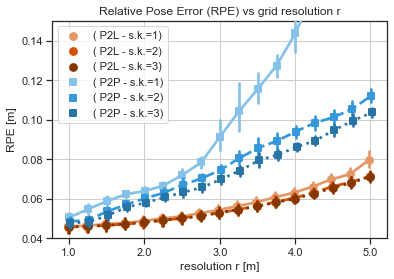

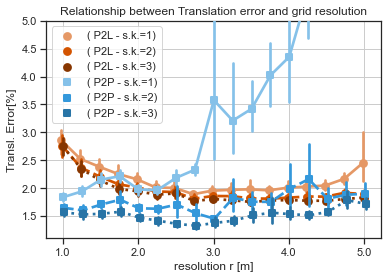

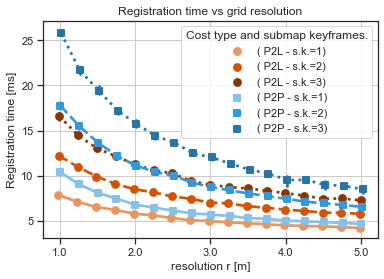

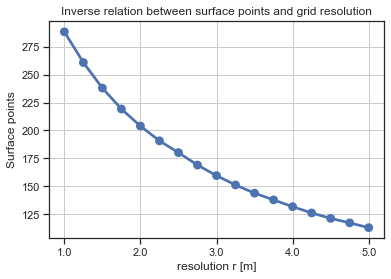

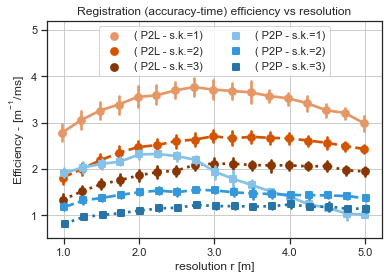

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv




sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")
#sns.set(font_scale=1.2)  # crazy big

colors = ["#E59866", "#D35400", "#873600", "#85C1E9", "#3498DB", "#2874A6"]
pal=sns.color_palette(colors)

mar=['o','o','o','s','s','s']
lin=['-','--',':','-','--',':']


### LOAD AND SORT NAMES OF COLUMNS
df = pd.read_csv('./CFEAR_eval_resolution_2021-07-17_09:22.csv', sep=r',', header=0)
df["Cost type"] = df.apply(lambda row:  row["cost type"].replace('"', ""), axis=1)
df = df.rename(columns={'Registration avg': 'Registration time [ms]'})
df = df.rename(columns={'Surface points avg': 'Surface points'})
df = df.rename(columns={'Transl. Error': 'Transl. Error[%]'})
df = df.rename(columns={'resolution r': 'resolution r [m]'})
#df=df.sort_values(by=["submap keyframes"])
df=df.sort_values(by=["Cost type", "submap keyframes"])
cost_and_submap_str='Cost type and submap keyframes.'
efficiency_str="Efficiency - $\mathregular{[m^{-1}/ms]}$"
df[efficiency_str] = df.apply(lambda row: 1/(row['RPE [m]']*row['Registration time [ms]']), axis=1)
df[cost_and_submap_str] = df.apply(lambda row: "("+row["Cost type"] +" - submap keyframes="+ str(row["submap keyframes"])+")", axis=1)




###### plt.title('Transl error due to resolution') ####################################
df[cost_and_submap_str] = df.apply(lambda row: "("+row["Cost type"] +" - s.k.="+ str(row["submap keyframes"])+")", axis=1)
sns_plot=sns.pointplot( x="resolution r [m]", y="RPE [m]", hue=cost_and_submap_str,
                   data=df, dodge=True,palette=pal,markers=mar,linestyles=lin)
plt.locator_params(axis='x', nbins=5)
sns_plot.legend(loc='upper left', ncol=1)
#plt.title('Computation time')
plt.ylim(0.04, 0.15)
#plt.ylim(0,4)
plt.title('Relative Pose Error (RPE) vs grid resolution r')
plt.grid()
plt.show()
fig=sns_plot.get_figure()
fig.savefig('./output/RPE_[m]_and_grid_resolution_.pdf', format='pdf')
fig.savefig('./output/RPE_[m]_and_grid_resolution_.png', format='png', dpi=1000)
##########################################################################################

###### plt.title('Transl error due to resolution') ####################################
df[cost_and_submap_str] = df.apply(lambda row: "("+row["Cost type"] +" - s.k.="+ str(row["submap keyframes"])+")", axis=1)
sns_plot=sns.pointplot( x="resolution r [m]", y="Transl. Error[%]", hue=cost_and_submap_str,
                   data=df, dodge=True,palette=pal,markers=mar,linestyles=lin)
plt.locator_params(axis='x', nbins=5)
sns_plot.legend(loc='upper left', ncol=1)
#plt.title('Computation time')
plt.ylim(1.1,5)
#plt.ylim(0,4)
plt.title('Relationship between Translation error and grid resolution')
plt.grid()
plt.show()
fig=sns_plot.get_figure()
fig.savefig('./output/Translation_error_and_grid_resolution.pdf', format='pdf')
fig.savefig('./output/Translation_error_and_grid_resolution.png', format='png', dpi=1000)
##########################################################################################



###### plt.title('Registration time of P2L and P2P') ####################################
sns_plot=sns.pointplot( x="resolution r [m]", y="Registration time [ms]", hue=cost_and_submap_str,
                   data=df, dodge=True,palette=pal,markers=mar,linestyles=lin)
plt.locator_params(axis='x', nbins=5)
#ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#plt.title('Computation time')
#plt.ylim(1.0,6)
plt.title('Registration time vs grid resolution')
plt.grid()
plt.show()
fig=sns_plot.get_figure()
fig.savefig('./output/Registration_time_of_P2L_and_P2P.pdf', format='pdf')
fig.savefig('./output/Registration_time_of_P2L_and_P2P.png', format='png', dpi=1000)
#########################################################################################



###### plt.title("Surface points and grid size") #####
sns_plot=sns.pointplot( x="resolution r [m]", y="Surface points",
                   data=df, dodge=True) #,linestyles=["-", "--"],)
plt.locator_params(axis='x', nbins=5)
#ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title("Inverse relation between surface points and grid resolution")
#plt.ylim(1.0,6)
plt.grid()
plt.show()
fig=sns_plot.get_figure()
fig.savefig('./output/Surface_points_and_grid_size.pdf', format='pdf')
fig.savefig('./output/Surface_points_and_grid_size.png', format='png', dpi=1000)
###########################################################################################



######### plt.title('Efficiency of cost function and submap keyframes (s.k.)') ############
df[cost_and_submap_str] = df.apply(lambda row: "("+row["Cost type"] +" - s.k.="+ str(row["submap keyframes"])+")", axis=1)
sns_plot=sns.pointplot( x="resolution r [m]", y=efficiency_str, hue=cost_and_submap_str,
                   data=df, dodge=True,palette=pal,markers=mar,linestyles=lin)
sns_plot.legend(frameon=True, loc='upper center', ncol=2)
sns_plot.locator_params(axis='x', nbins=5)
plt.title('Registration (accuracy-time) efficiency vs resolution')
plt.ylim(0.5, 5.2)
#plt.xlim(0,15)
plt.grid()
plt.show()
fig=sns_plot.get_figure()
fig.savefig('./output/Efficiency_of_cost_function_and_submap_keyframes.pdf', format='pdf')
fig.savefig('./output/Efficiency_of_cost_function_and_submap_keyframes.png', format='png', dpi=1000)
############################################################################################







